**Two Way ANOVA**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1- Create dataset

In [5]:
df= pd.DataFrame({'water': np.repeat(['daily','weekly'], 15),
                  'sun': np.tile(np.repeat(['low', 'medium', 'high'],5),2),
                  'height': [6,6,6,5,6,6,4,4,5,6,
                             6,6,7,8,7,3,4,4,5,7,
                             4,4,4,4,4,5,5,6,7, 8]})
df.sample(10)


,water,sun,height
9,daily,medium,6
11,daily,high,6
14,daily,high,7
26,weekly,high,5
7,daily,medium,4
16,weekly,low,4
23,weekly,medium,4
1,daily,low,6
6,daily,medium,4
17,weekly,low,4


2- Plotting

C:\Users\Javeria\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

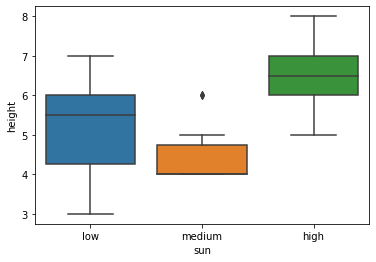

In [6]:
sns.boxplot(df['sun'], df['height']) #x=sun, y= height (one way anova) 

C:\Users\Javeria\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

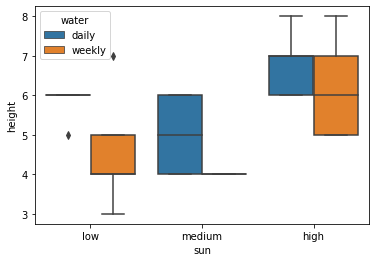

In [7]:
sns.boxplot(df['sun'], df['height'], hue= df['water'])# two way anova

3- Applying ANOVA

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


One-way ANOVA

In [9]:
model= ols('height ~ sun',data= df).fit()
sm.stats.anova_lm(model, type=2) 

,df,sum_sq,mean_sq,F,PR(>F)
sun,2.0,20.6,10.300000,9.088235,0.00096
Residual,27.0,30.6,1.133333,NaN,NaN


Two-way ANOVA

In [10]:
model= ols('height ~ C(sun) + C(water) + C(sun) : C(water)',data= df).fit()
sm.stats.anova_lm(model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(sun),2.0,20.600000,10.300000,10.474576,0.000537
C(water),1.0,6.533333,6.533333,6.644068,0.016518
C(sun):C(water),2.0,0.466667,0.233333,0.237288,0.790593
Residual,24.0,23.600000,0.983333,NaN,NaN


**Result = 0.79 is not significant**

other way of doing ANOVA

In [11]:
import pingouin as pg
aov= pg.anova(data= df, dv= 'height', between= ['sun', 'water'], detailed= True)
print(aov)

        Source         SS  DF         MS          F     p-unc       np2
0          sun  20.600000   2  10.300000  10.474576  0.000537  0.466063
1        water   6.533333   1   6.533333   6.644068  0.016518  0.216814
2  sun * water   0.466667   2   0.233333   0.237288  0.790593  0.019391
3     Residual  23.600000  24   0.983333        NaN       NaN       NaN


4- **Tukey Test**

In [21]:
pt= pg.pairwise_tukey(data= df, dv= 'height', between= ['sun'])
print(pt)

      A       B  mean(A)  mean(B)  diff        se         T   p-tukey  \
0  high     low      6.5      5.2   1.3  0.476095  2.730546  0.028700   
1  high  medium      6.5      4.5   2.0  0.476095  4.200840  0.000737   
2   low  medium      5.2      4.5   0.7  0.476095  1.470294  0.320671   

     hedges  
0  1.169540  
1  1.799292  
2  0.629752  


In [22]:
pt= pg.pairwise_tukey(data= df, dv= 'height', between= ['water'])
print(pt)

       A       B   mean(A)   mean(B)      diff        se        T   p-tukey  \
0  daily  weekly  5.866667  4.933333  0.933333  0.461192  2.02374  0.052635   

     hedges  
0  0.718993  


**Result** = p value is shows significant difference.

5- **qq normplot**

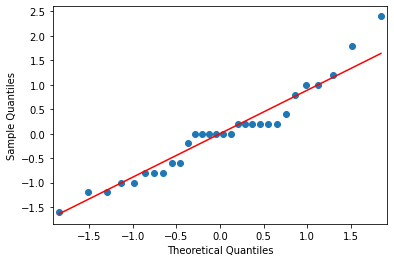

In [23]:
res= model.resid
fig= sm.qqplot(res, line= 's')
plt.show()

6- **Annotation**

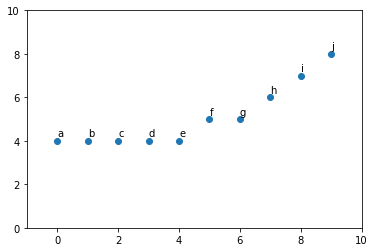

In [27]:
x = [x for x in range(10)]
y = [4,4,4,4,4,5,5,6,7, 8]
text = ["a", "b", "c", "d", "e", "f", "g", "h", "i","j"]
  
# plotting scatter plot
plt.scatter(x, y)
  
# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i] + 0.2))
  
# adjusting the scale of the axes
plt.xlim((-1, 10))
plt.ylim((0, 10))
plt.show()

7- **Grouping**

In [30]:
from itertools import groupby

In [31]:
# initializing list
test_list = ['water', 'sun', 'height']
  
# printing original list
print("The original list : " + str(test_list))
  
# using sorted() + groupby()
# Initial Character Case Categorization
util_func = lambda x: x[0]
temp = sorted(test_list, key = util_func)
res = [list(ele) for i, ele in groupby(temp, util_func)]
  
# print result
print("The list after Categorization : " + str(res))

The original list : ['water', 'sun', 'height']
The list after Categorization : [['height'], ['sun'], ['water']]


                                                                    By: javeria altaf
                                                                    javeriaaltaf71@gmail.com